# Sparse Plane Array

疎な平配

In [3]:
Format[splarr[{}]] := Grid[{{Item[0, Frame -> True]}}]

Format[splarr[ruleLi_List]] := 
  With[
    {
      minPos = Min[#, 0] & /@ Min /@ Transpose[ReIm[First[#]] & /@ ruleLi], 
      maxPos = Max[#, 0] & /@ Max /@ Transpose[ReIm[First[#]] & /@ ruleLi]
    }, 
    With[{
      tbl = PadRight[
        Normal[
          SparseArray[(1 - minPos + ReIm[#[[1]]]) -> #[[2]] & /@ ruleLi]
        ], maxPos + 1 - minPos
      ]}, 
      Grid[
        Transpose[
          ReplacePart[tbl, 
            1 - minPos -> Item[
              Extract[tbl, 1 - minPos], Frame -> True
            ]
          ]
        ]
      ]
    ]
  ]

In [5]:
normal[splarr[ruleLi__List]] := 
    splarr[Normal[Select[Map[Plus @@ (Last[#] & /@ #) &, GroupBy[ruleLi, First]], !(# === 0) &]]]

In [6]:
Unprotect[Plus];
Plus[splarr[ruleLi1_List], splarr[ruleLi2_List]] := 
    normal[splarr[Join[ruleLi1, ruleLi2]]]
Plus[sa1_splarr, b_] := Plus[sa1, splarr[{0 -> b}]]
Protect[Plus];

In [10]:
convApply[f_, li_List, val_] := f[#, val] & /@ li
convApply[f_, li1_List, li2_List] := convApply[f, li1, #] & /@ li2

Unprotect[Times];
Times[splarr[ruleLi1_List], splarr[ruleLi2_List]] := 
    normal[splarr[
        Join @@ convApply[
            (#1[[1]] + #2[[1]]) -> (#1[[2]] #2[[2]]) &, ruleLi1, ruleLi2
        ]
    ]]
Times[sa1_splarr, b_] := Times[sa1, splarr[{0 -> b}]]
Protect[Times];

In [16]:
Unprotect[Power];
Power[a_splarr, b_?Positive] := normal[Fold[Times, Table[a, b]]]
Protect[Power];

Item[11, Frame -> True]   0   0   1

7                         0   0   0

0                         0   0   0

5                         0   0   0
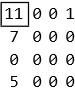

In [19]:
splarr[{
    0 -> 3,
    I -> 7
}] + splarr[{
    0 -> 8,
    3 -> 1,
    3I -> 5
}]

1   Item[2, Frame -> True]   1

1   1                        0
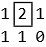

In [20]:
splarr[{
    0 -> 1,
    1 -> 1,
    I -> 1
}] splarr[{
    0 -> 1,
    -1 -> 1
}]

In [204]:
Unprotect[NonCommutativeMultiply];
NonCommutativeMultiply[splarr[ruleLi1_List], splarr[ruleLi2_List]] := Sum[Sum[splarr[{ First[rule2] + First[rule1] Last[rule2] -> Last[rule1] }], {rule1, ruleLi1}], {rule2, ruleLi2}]
Protect[NonCommutativeMultiply];

Item[1, Frame -> True]   1

1                        0

1                        0
Item[1, Frame -> True]   1   1   1

1                        1   1   1

1                        1   1   1

1                        1   1   1
Item[1, Frame -> True]   0    1   0

0                        0    0   0

0                        0    0   0

0                        -1   0   -1
Item[1, Frame -> True]   1   1   1

1                        1   1   1

1                        1   1   1

1                        1   1   1
Item[0, Frame -> True]   0   0   I

-I                       0   0   0

0                        0   0   I

-I                       0   0   0
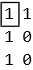
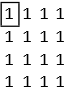
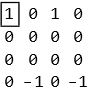
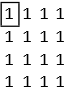
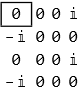

In [169]:
splarr[{0 -> 1, 1 -> 1, I -> 1, 2I -> 1}]

splarr[{0 -> 1, 1 -> 1, I -> 1, 2I -> 1}] ** splarr[{0 -> 1, 1 + 3I -> -1, 2 -> 1, 3 + 3I -> -1}]
splarr[{0 -> 1, 1 + 3I -> -1, 2 -> 1, 3 + 3I -> -1}]

splarr[{0 -> 1, 1 -> 1, I -> 1, 2I -> 1}] ** splarr[{I -> -I, 3 -> I, 3I -> -I, 3 + 2I -> I}]
splarr[{I -> -I, 3 -> I, 3I -> -I, 3 + 2I -> I}]

In [200]:
Unprotect[CircleTimes];
CircleTimes[splarr[ruleLi1_List], splarr[ruleLi2_List]] := Sum[Sum[splarr[{ First[rule1] First[rule2] -> Last[rule1] Last[rule2] }], {rule1, ruleLi1}], {rule2, ruleLi2}]
SetAttributes[CircleTimes, { Flat, Listable, NumericFunction, OneIdentity, Orderless, Protected }]
Unprotect[CircleTimes];

1   Item[0, Frame -> True]

1   1
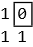

In [33]:
CircleTimes[splarr[{1 -> 1, 1 + I -> 1, I -> 1}], splarr[{I -> 1}]]

1   1                        1

1   Item[0, Frame -> True]   1

1   1                        1
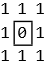

In [34]:
CircleTimes[splarr[{1 -> 1, 1 + I -> 1}], splarr[{1 -> 1, I -> 1, -1 -> 1, -I -> 1}]]

Item[0, Frame -> True]   0

0                        1

0                        1
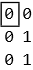

In [35]:
Times[splarr[{1 -> 1, 1 + I -> 1}], splarr[{I -> 1}]]

0   Item[0, Frame -> True]

1   1
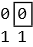

In [36]:
CircleTimes[splarr[{1 -> 1, 1 + I -> 1}], splarr[{I -> 1}]]

In [37]:
li = normal[splarr[{0 -> #[[1]], 1 -> #[[2]], I -> #[[3]], -1 -> #[[4]], -I -> #[[5]] }]] & /@ Tuples[Prepend[I^Range[0, 3], 0], 5];

In [38]:
Select[li, # + # == splarr[{}] &]

{Item[0, Frame -> True]}

In [39]:
Select[li, # * # == splarr[{}] &]

{Item[0, Frame -> True]}

In [40]:
Select[li, # + # == splarr[{0 -> 1}] &]

{}

In [41]:
Select[li, # * # == splarr[{0 -> 1}] &]

{Item[1, Frame -> True], Item[-1, Frame -> True]}

In [51]:
Select[li, CircleTimes[#, #] == splarr[{0 -> 1}] &]

{Item[1, Frame -> True], Item[-1, Frame -> True]}

In [42]:
Select[li, # + # == # &]

{Item[0, Frame -> True]}

In [43]:
Select[li, # * # == # &]

{Item[0, Frame -> True], Item[1, Frame -> True]}

In [52]:
Select[li, CircleTimes[#, #] == # &]

{Item[0, Frame -> True]   1, Item[1, Frame -> True], Item[-1, Frame -> True]   1}

In [44]:
Select[li, # + # == splarr[{1 -> 1}] &]

{}

In [45]:
Select[li, # * # == splarr[{1 -> 1}] &]

{}

In [53]:
Select[li, CircleTimes[#, #] == splarr[{1 -> 1}] &]

{1   Item[0, Frame -> True], -1   Item[0, Frame -> True], Item[0, Frame -> True]   1, 
 
>   Item[0, Frame -> True]   -1}

In [46]:
Select[li, # * # == splarr[{2 -> 1}] &]

{Item[0, Frame -> True]   1, Item[0, Frame -> True]   -1}

In [58]:
Select[li, CircleTimes[#, #] == splarr[{2 -> 1}] &]

{}

## 逆数の実験

1
                             --------------------------
                             Item[0, Frame -> True]   1

Item[0, Frame -> True]       1                        0

            1
--------------------------
Item[0, Frame -> True]   1

1                        0   0
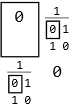

In [212]:
splarr[{1 -> 1, I -> 1}] / splarr[{1 -> 1, I -> 1}]

1
                                 ------------------------------
                                 0   1                        0

                                 1   Item[0, Frame -> True]   1

0                                0   1                        0
 






>    0

              1
------------------------------
0   1                        0

1   Item[0, Frame -> True]   1

0   1                        0   Item[0, Frame -> True]
 
                   1
     ------------------------------
     0   1                        0

     1   Item[0, Frame -> True]   1

>    0   1                        0

                                               1
                                 ------------------------------
                                 0   1                        0

                                 1   Item[0, Frame -> True]   1

0                                0   1                        0
 






>    0
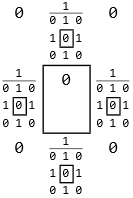

In [219]:
splarr[{1 -> 1, I -> 1, -1 -> 1, -I -> 1}] / splarr[{1 -> 1, I -> 1, -1 -> 1, -I -> 1}]

1
-----
1
- + p
p
  p
------
     2
1 + p
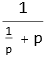
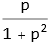

In [231]:
1 / (p + 1 / p)
p / (p^2 + 1)

1
-----
1 + p
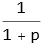

In [535]:
Limit[Sum[- 1 / (-p)^i, {i, n}], {n -> Infinity}, Assumptions -> p > 1]

In [548]:
Series[1 / (1 + x), {x, 0, 8}]

2    3    4    5    6    7    8       9
1 - x + x  - x  + x  - x  + x  - x  + x  + O[x]

In [537]:
splarr[{0 -> 1, 1 -> -1, 2 -> 1, 3 -> -1, 4 -> 1}]
splarr[{0 -> 1, 1 -> 1}]

%% * %

Item[1, Frame -> True]   -1   1   -1   1
Item[1, Frame -> True]   1
Item[1, Frame -> True]   0   0   0   0   1

In [542]:
splarr[{0 -> 1, 3 -> -1, 6 -> 1, 12 -> -1, 15 -> 1}]
splarr[{0 -> 1, 3 -> 1}]

%% * %

Item[1, Frame -> True]   0   0   -1   0   0   1   0   0   0   0   0   -1   0   0   1
Item[1, Frame -> True]   0   0   1
Item[1, Frame -> True]   0   0   0   0   0   0   0   0   1   0   0   -1   0   0   0
 
>       0   0   1

In [589]:
Series[1 / (1 + x^2), {x, 0, 8}]

2    4    6    8       9
1 - x  + x  - x  + x  + O[x]

In [590]:
splarr[{0 -> 1, 2 -> -1, 4 -> 1, 6 -> -1, 8 -> 1}]
splarr[{0 -> 1, 2 -> 1}]
%% * %

splarr[{-2 -> 1, -4 -> -1, -6 -> 1, -8 -> -1}]
splarr[{0 -> 1, 2 -> 1}]
%% * %

Item[1, Frame -> True]   0   -1   0   1   0   -1   0   1
Item[1, Frame -> True]   0   1
Item[1, Frame -> True]   0   0   0   0   0   0   0   0   0   1
-1   0   1   0   -1   0   1   0   Item[0, Frame -> True]
Item[1, Frame -> True]   0   1
-1   0   0   0   0   0   0   0   Item[1, Frame -> True]

In [596]:
Series[1 / (x + x^(-1)), {x, 0, 8}]

3    5    7       9
x - x  + x  - x  + O[x]

In [627]:
splarr[{1 -> 1, 3 -> -1, 5 -> 1, 7 -> -1}]
splarr[{1 -> 1, -1 -> 1}]
%% * %

splarr[{-1 -> 1, -3 -> -1, -5 -> 1, -7 -> -1}]
splarr[{1 -> 1, -1 -> 1}]
%% * %

Item[0, Frame -> True]   1   0   -1   0   1   0   -1
1   Item[0, Frame -> True]   1
Item[1, Frame -> True]   0   0   0   0   0   0   0   -1
-1   0   1   0   -1   0   1   Item[0, Frame -> True]
1   Item[0, Frame -> True]   1
-1   0   0   0   0   0   0   0   Item[1, Frame -> True]

In [633]:
Series[1 / (1 + x + x^2), {x, 0, 8}]

3    4    6    7       9
1 - x + x  - x  + x  - x  + O[x]

In [662]:
splarr[{0 -> 1, 1 -> -1, 3 -> 1, 4 -> -1, 6 -> 1}]
splarr[{0 -> 1, 1 -> 1, 2 -> 1}]
%% * %

Item[1, Frame -> True]   -1   0   1   -1   0   1
Item[1, Frame -> True]   1   1
Item[1, Frame -> True]   0   0   0   0   0   0   1   1

In [865]:
Series[1 / (1 + x + x^(-1)), {x, 0, 16}]

2    4    5    7    8    10    11    13    14    16       17
x - x  + x  - x  + x  - x  + x   - x   + x   - x   + x   + O[x]

In [875]:
splarr[{1 -> 1, 2 -> -1, 4 -> 1, 5 -> -1, 7 -> 1, 8 -> -1, 10 -> 1, 11 -> -1, 13 -> 1, 14 -> -1, 16 -> 1}]
splarr[{0 -> 1, 1 -> 1, -1 -> 1}]
%% * %

splarr[{-1 -> 1, -2 -> -1, -4 -> 1, -5 -> -1, -7 -> 1, -8 -> -1, -10 -> 1, -11 -> -1, -13 -> 1, -14 -> -1, -16 -> 1}]
splarr[{0 -> 1, 1 -> 1, -1 -> 1}]

%% * %

splarr[{0 -> 1, 2 -> -1, -2 -> -1, 3 -> 1, -3 -> 1, 5 -> -1, -5 -> -1, 6 -> 1, -6 -> 1}]
splarr[{0 -> 1, 1 -> 1, -1 -> 1}]

%% * %

Item[0, Frame -> True]   1   -1   0   1   -1   0   1   -1   0   1   -1   0   1   -1
 
>       0   1
1   Item[1, Frame -> True]   1
Item[1, Frame -> True]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
 
>       1
1   0   -1   1   0   -1   1   0   -1   1   0   -1   1   0   -1   1   Item[0, 
 
>    Frame -> True]
1   Item[1, Frame -> True]   1
1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   Item[1, 
 
>    Frame -> True]
1   -1   0   1   -1   0   Item[1, Frame -> True]   0   -1   1   0   -1   1
1   Item[1, Frame -> True]   1
1   0   0   0   0   0   0   Item[1, Frame -> True]   0   0   0   0   0   0   1

1       6       -2       6        -3       6   2      -4       6   3
(- + O[y] ) + (-y   + O[y] ) x + (y   + O[y] ) x  + (-y   + O[y] ) x  + 
 y
 
      -5       6   4      -6       6   5       6
>   (y   + O[y] ) x  + (-y   + O[y] ) x  + O[x]
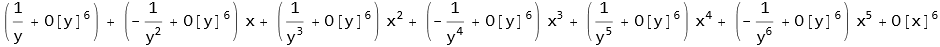

In [528]:
Series[1 / (x + y), {x, 0, 5}, {y, 0, 5}]

0                        0    0   0    1

0                        0    0   -1   0

0                        0    1   0    0

0                        -1   0   0    0

1                        0    0   0    0

Item[0, Frame -> True]   0    0   0    0
Item[0, Frame -> True]   1

1                        0
0                        0   0   0   0   1

0                        0   0   0   0   0

0                        0   0   0   0   0

0                        0   0   0   0   0

0                        0   0   0   0   0

Item[1, Frame -> True]   0   0   0   0   0
0   0    0   0    1   Item[0, Frame -> True]

0   0    0   -1   0   0

0   0    1   0    0   0

0   -1   0   0    0   0

1   0    0   0    0   0
Item[0, Frame -> True]   1

1                        0
0   0   0   0   0   Item[1, Frame -> True]

0   0   0   0   0   0

0   0   0   0   0   0

0   0   0   0   0   0

0   0   0   0   0   0

1   0   0   0   0   0
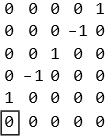
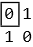
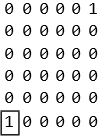
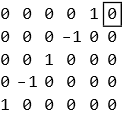
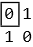
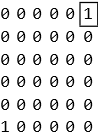

In [436]:
splarr[{-I -> 1, 1 - 2I -> -1, 2 - 3I -> 1, 3 - 4I -> -1, 4 - 5I -> 1}]
splarr[{1 -> 1, I -> 1}]
%% * %

splarr[{-1 -> 1, -2 + I -> -1, -3 + 2I -> 1, -4 + 3I -> -1, -5 + 4I -> 1}]
splarr[{1 -> 1, I -> 1}]
%% * %

1            6   2     -2        2       6   3      -3   1        3       6   4
x + (-(-) - y + O[y] ) x  + (y   + 1 + y  + O[y] ) x  + (-y   - - - y - y  + O[y] ) x  + 
       y                                                        y
 
      -4    -2        2    4       6   5       6
>   (y   + y   + 1 + y  + y  + O[y] ) x  + O[x]
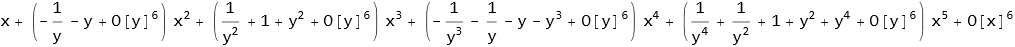

In [514]:
Series[1 / (x + x^(-1) + y + y^(-1)), {x, 0, 5}, {y, 0, 5}]

0                        0   0    0   0    1

0                        0   0    0   -1   0

0                        0   0    1   0    1

0                        0   -1   0   -1   0

Item[0, Frame -> True]   1   0    1   0    1

0                        0   -1   0   -1   0

0                        0   0    1   0    1

0                        0   0    0   -1   0

0                        0   0    0   0    1
0   1                        0

1   Item[0, Frame -> True]   1

0   1                        0
0                        0   0   0   0   1   0

0                        0   0   0   0   0   1

0                        0   0   0   0   1   0

0                        0   0   0   0   0   1

0                        0   0   0   0   1   0

Item[1, Frame -> True]   0   0   0   0   0   1

0                        0   0   0   0   1   0

0                        0   0   0   0   0   1

0                        0   0   0   0   1   0

0                        0   0   0   0   0   1

0                        0   0   0   0   1   0
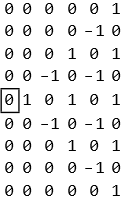
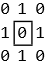
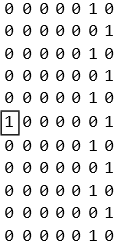

In [511]:
splarr[{1 -> 1, 2 + I -> -1, 2 - I -> -1, 3 + 2I -> 1, 3 -> 1, 3 - 2I -> 1, 4 + 3I -> -1, 4 + I -> -1, 4 - I -> -1, 4 - 3I -> -1, 5 + 4I -> 1, 5 + 2I -> 1, 5 -> 1, 5 - 2I -> 1, 5 - 4I -> 1}]
splarr[{1 -> 1, I -> 1, -1 -> 1, -I -> 1}]
%% * %

Item[0, Frame -> True]   1

1                        0
1                        0

Item[0, Frame -> True]   1
0                        1   0

Item[1, Frame -> True]   0   1

0                        1   0
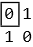
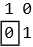
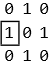

In [951]:
splarr[{1 -> 1, I -> 1}]
splarr[{1 -> 1, -I -> 1}]

%% * %

1                6   2     -2   2              2       6   3
x + (-(-) - 1 - y + O[y] ) x  + (y   + - + 2 + 2 y + y  + O[y] ) x  + 
       y                               y
 
       -3   3    4                2    3       6   4
>   (-y   - -- - - - 5 - 4 y - 3 y  - y  + O[y] ) x  + 
             2   y
            y
 
      -4   4    7    10                  2      3    4       6   5       6
>   (y   + -- + -- + -- + 11 + 10 y + 7 y  + 4 y  + y  + O[y] ) x  + O[x]
            3    2   y
           y    y
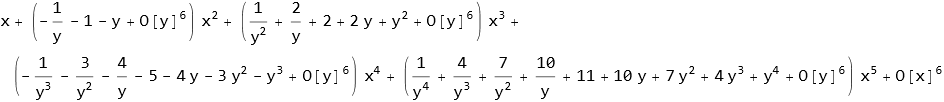

In [515]:
Series[1 / (1 + x + x^(-1) + y + y^(-1)), {x, 0, 5}, {y, 0, 5}]

0   0    1   1                        1   0    0

0   0    0   -1                       0   0    0

1   0    0   0                        0   0    1

1   -1   0   Item[1, Frame -> True]   0   -1   1

1   0    0   0                        0   0    1

0   0    0   -1                       0   0    0

0   0    1   1                        1   0    0
0   1                        0

1   Item[1, Frame -> True]   1

0   1                        0
0   0   0   1   1                        1   0   0   0

0   0   1   2   2                        2   1   0   0

0   1   0   0   0                        0   0   1   0

1   2   0   0   0                        0   0   2   1

1   2   0   0   Item[1, Frame -> True]   0   0   2   1

1   2   0   0   0                        0   0   2   1

0   1   0   0   0                        0   0   1   0

0   0   1   2   2                        2   1   0   0

0   0   0   1   1                        1   0   0   0
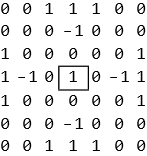
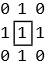
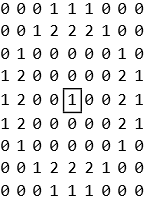

In [947]:
splarr[{0 -> 1, 2 -> -1, 2I -> -1, -2 -> -1, -2I -> -1, 3 -> 1, 3 + I -> 1, 3 - I -> 1, 3I -> 1, 1 + 3I -> 1, -1 + 3I -> 1, -3 -> 1, -3 - I -> 1, -3 + I -> 1, -3I -> 1, -1 - 3I -> 1, 1 - 3I -> 1}]
splarr[{0 -> 1, 1 -> 1, I -> 1, -1 -> 1, -I -> 1}]
%% * %